2.15.0
11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
60000
(10000, 28, 28)
10000


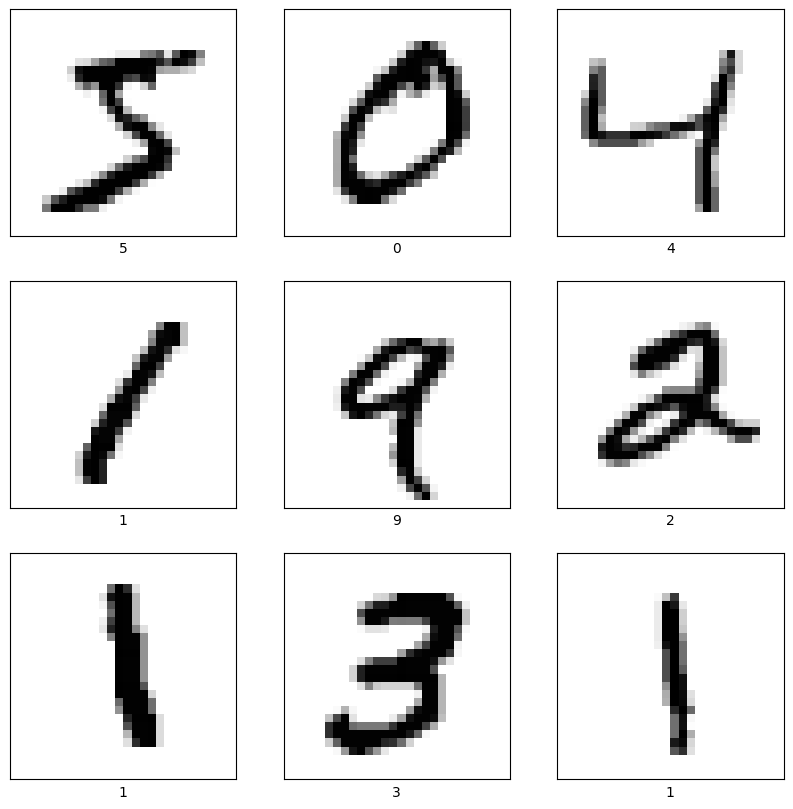

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.2405 - accuracy: 0.9301
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0993 - accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0697 - accuracy: 0.9780
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0551 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0403 - accuracy: 0.9864
313/313 - 1s - loss: 0.0736 - accuracy: 0.9785 - 634ms/epoch - 2ms/step

Exactitud en el conjunto de prueba: 0.9785000085830688
313/313 [==============================] - 1s 2ms/step


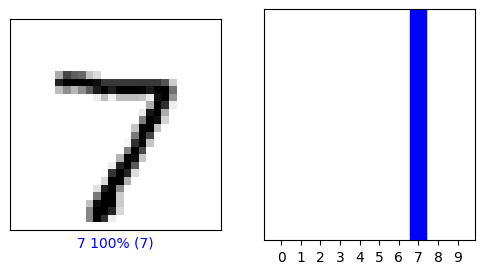

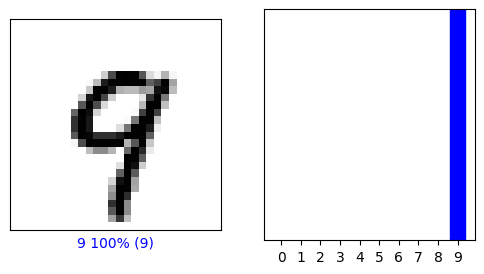

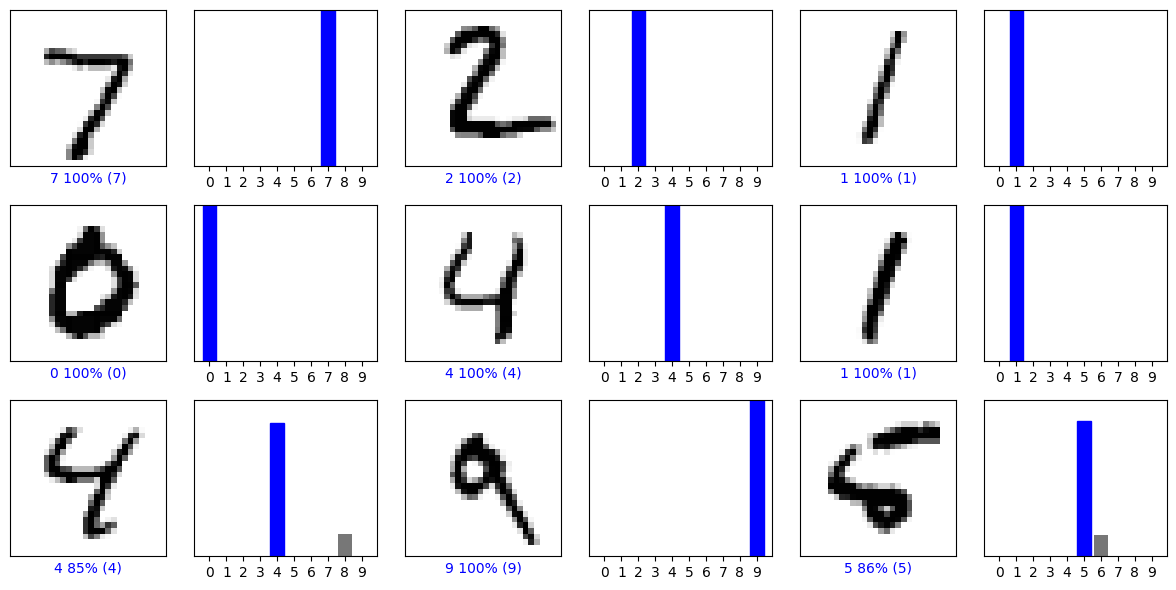

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 19ms/step
[[8.0128480e-11 5.4173020e-06 9.9999332e-01 1.2918247e-06 9.6612599e-16
  1.2997816e-08 1.8749689e-12 4.3809351e-10 2.3888616e-10 5.5006663e-15]]


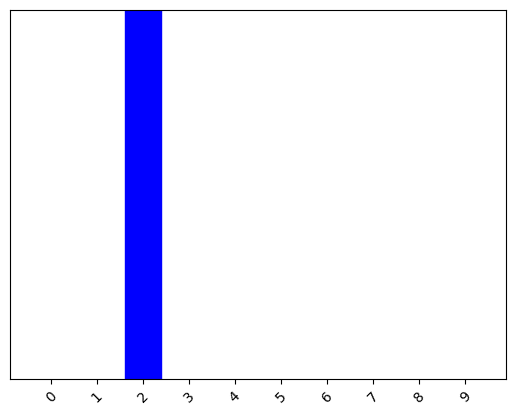

2


In [1]:
#Actividad 5: Uso de software para búsqueda. N4 006
#Brisa Marlene Mar Santiago 2127823

# TensorFlow y tf.keras
import tensorflow as tf

# Librerías auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

# Cargar el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(imagenes_entrenamiento, etiquetas_entrenamiento), (imagenes_prueba, etiquetas_prueba) = mnist.load_data()

nombres_clases = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Mostrar la forma de los conjuntos de datos de entrenamiento y prueba
print(imagenes_entrenamiento.shape)
print(len(etiquetas_entrenamiento))
print(imagenes_prueba.shape)
print(len(etiquetas_prueba))

# Normalizar las imágenes
imagenes_entrenamiento = imagenes_entrenamiento / 255.0
imagenes_prueba = imagenes_prueba / 255.0

# Mostrar las primeras 9 imágenes del conjunto de entrenamiento con sus etiquetas
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_entrenamiento[i], cmap=plt.cm.binary)
    plt.xlabel(nombres_clases[etiquetas_entrenamiento[i]])
plt.show()

# Construir el modelo con una capa adicional y una función de activación diferente
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),  # Capa adicional
    tf.keras.layers.Dense(10)
])

# Compilar el modelo
modelo.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

# Entrenar el modelo con menos épocas
modelo.fit(imagenes_entrenamiento, etiquetas_entrenamiento, epochs=5)

# Evaluar el modelo
perdida_prueba, exactitud_prueba = modelo.evaluate(imagenes_prueba, etiquetas_prueba, verbose=2)
print('\nExactitud en el conjunto de prueba:', exactitud_prueba)

# Crear un modelo de probabilidad
modelo_probabilidad = tf.keras.Sequential([modelo,
                                           tf.keras.layers.Softmax()])

# Realizar predicciones
predicciones = modelo_probabilidad.predict(imagenes_prueba)

# Función para graficar la imagen con la predicción
def graficar_imagen(i, array_predicciones, etiqueta_verdadera, img):
    etiqueta_verdadera, img = etiqueta_verdadera[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    etiqueta_predicha = np.argmax(array_predicciones)
    if etiqueta_predicha == etiqueta_verdadera:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_predicha],
                                100*np.max(array_predicciones),
                                nombres_clases[etiqueta_verdadera]),
                                color=color)

# Función para graficar el array de valores
def graficar_array_valores(i, array_predicciones, etiqueta_verdadera):
    etiqueta_verdadera = etiqueta_verdadera[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), array_predicciones, color="#777777")
    plt.ylim([0, 1])
    etiqueta_predicha = np.argmax(array_predicciones)

    thisplot[etiqueta_predicha].set_color('red')
    thisplot[etiqueta_verdadera].set_color('blue')

# Graficar una predicción y su array de valores
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
graficar_imagen(i, predicciones[i], etiquetas_prueba, imagenes_prueba)
plt.subplot(1,2,2)
graficar_array_valores(i, predicciones[i], etiquetas_prueba)
plt.show()

# Graficar otra predicción y su array de valores
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
graficar_imagen(i, predicciones[i], etiquetas_prueba, imagenes_prueba)
plt.subplot(1,2,2)
graficar_array_valores(i, predicciones[i], etiquetas_prueba)
plt.show()

# Graficar las primeras X imágenes de prueba, sus etiquetas predichas y las etiquetas verdaderas
num_filas = 3
num_columnas = 3
num_imagenes = num_filas * num_columnas
plt.figure(figsize=(2*2*num_columnas, 2*num_filas))
for i in range(num_imagenes):
    plt.subplot(num_filas, 2*num_columnas, 2*i+1)
    graficar_imagen(i, predicciones[i], etiquetas_prueba, imagenes_prueba)
    plt.subplot(num_filas, 2*num_columnas, 2*i+2)
    graficar_array_valores(i, predicciones[i], etiquetas_prueba)
plt.tight_layout()
plt.show()

# Obtener una imagen del conjunto de prueba
img = imagenes_prueba[1]
print(img.shape)

# Añadir la imagen a un batch donde es el único miembro
img = (np.expand_dims(img, 0))
print(img.shape)

# Realizar una predicción para la imagen individual
predicciones_individual = modelo_probabilidad.predict(img)
print(predicciones_individual)

# Graficar el array de valores de la predicción para la imagen individual
graficar_array_valores(1, predicciones_individual[0], etiquetas_prueba)
_ = plt.xticks(range(10), nombres_clases, rotation=45)
plt.show()

# Imprimir la etiqueta predicha para la imagen individual
print(np.argmax(predicciones_individual[0]))
